In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"zomato.csv",encoding= 'latin-1' )
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
data.shape

(9551, 21)

removing Unwanted columns

In [5]:
data.drop(columns= [ 'Is delivering now' , 'Restaurant ID' ], inplace =True )

In [6]:
data.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [7]:
data['Country Code'].nunique()

15

In [8]:
data['Country Code'].value_counts()

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

Since most of the data belong to one country only i.e. 1 . We can seperate the data on the basis of this column , this will allow us to remove more unwanted columns like Country Code and Currency as it will be well known.

In [9]:
mask = data['Country Code']==1
data=data[mask]

In [10]:
data.shape

(8652, 19)

In [11]:
data.drop(columns= [ 'Country Code' , 'Currency' ], inplace =True )
data.columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

considering city

In [12]:
data['City'].nunique()

43

In [13]:
data['City'].value_counts()

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: count, dtype: int64

Since most of the data is coming from only 3 cities , we should keep them only , this will allow us to train our model based only on the same kind of data points.

In [14]:
mask= data['City'].isin(['New Delhi', 'Gurgaon' ,'Noida'])
data=data[mask]


In [15]:
data.shape

(7671, 17)

In [16]:
data['Restaurant Name'].nunique()

5834

In [17]:
data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day         81
Domino's Pizza          75
Subway                  60
Green Chick Chop        47
McDonald's              44
                        ..
Sahni Chicken Corner     1
Rewari Sweets            1
Pindi's Kitchen          1
Nagi Fish Corner         1
The Grand                1
Name: count, Length: 5834, dtype: int64

In [18]:
data.columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

As we can see that name of the restaurant can impact the price but also not so significantly so it can be removed . Apart from that Address , Locality and Locality Verbose does not make any sense as they indirectly shows latitude and longitude . They will not create any sort of sense if fed to the model so they too can be removed. Similarly Rating Color clones Aggregate Rating and Rating Text will not make any impact to the model as it will eventually take integer as input.

In [19]:
data.drop(columns= [ 'Restaurant Name' , 'Address', 'Locality', 'Locality Verbose', 'Rating color', 'Rating text' ], inplace =True )


In [20]:
data.columns

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [21]:
data['Switch to order menu'].value_counts()

Switch to order menu
No    7671
Name: count, dtype: int64

Since this column has only one kind of value then removing it as it won't affect the model prediction.

In [22]:
data.drop(columns= [ 'Switch to order menu' ], inplace =True)

In [23]:
data.shape

(7671, 10)

In [24]:
data.columns

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object')

Focusing on 'Has table booking' and 'has online delivery' column , the values are in the form of yes and no . So to make them in integer value we can replace Yes with 1 and No with 0 .

In [25]:
data['Has Online delivery'].replace('Yes',1, inplace=True)
data['Has Online delivery'].replace('No',0, inplace=True)


In [26]:
data['Has Online delivery'].value_counts()

Has Online delivery
0    5393
1    2278
Name: count, dtype: int64

In [27]:
data['Has Table booking'].replace('Yes',1, inplace=True)
data['Has Table booking'].replace('No',0, inplace=True)


In [28]:
data['Has Table booking'].value_counts()

Has Table booking
0    6640
1    1031
Name: count, dtype: int64

In [29]:
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
correlation_matrix


,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
Longitude,1.000000,0.997721,0.071854,0.059863,0.138230,0.082031,0.221801,0.071482
Latitude,0.997721,1.000000,0.070816,0.060228,0.137746,0.081059,0.221399,0.071196
Average Cost for two,0.071854,0.070816,1.000000,0.643845,0.072198,0.848425,0.329785,0.297741
Has Table booking,0.059863,0.060228,0.643845,1.000000,0.072631,0.661477,0.251972,0.224377
Has Online delivery,0.138230,0.137746,0.072198,0.072631,1.000000,0.184855,0.339658,0.121491
Price range,0.082031,0.081059,0.848425,0.661477,0.184855,1.000000,0.372624,0.325489
Aggregate rating,0.221801,0.221399,0.329785,0.251972,0.339658,0.372624,1.000000,0.291500
Votes,0.071482,0.071196,0.297741,0.224377,0.121491,0.325489,0.291500,1.000000


In [30]:
data.columns

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object')

In [31]:
data['City'].describe

<bound method NDFrame.describe of 1161    Gurgaon
1162    Gurgaon
1163    Gurgaon
1164    Gurgaon
1165    Gurgaon
         ...   
9108      Noida
9109      Noida
9110      Noida
9111      Noida
9112      Noida
Name: City, Length: 7671, dtype: object>

In [32]:
# Select only the numeric columns for correlation
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()


Data.corr() was giving an error due to Gurgaon being treated as string in some coulmn , so to only include numerical column I did the above step

In [33]:
numeric_data.corr()

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
Longitude,1.000000,0.997721,0.071854,0.059863,0.138230,0.082031,0.221801,0.071482
Latitude,0.997721,1.000000,0.070816,0.060228,0.137746,0.081059,0.221399,0.071196
Average Cost for two,0.071854,0.070816,1.000000,0.643845,0.072198,0.848425,0.329785,0.297741
Has Table booking,0.059863,0.060228,0.643845,1.000000,0.072631,0.661477,0.251972,0.224377
Has Online delivery,0.138230,0.137746,0.072198,0.072631,1.000000,0.184855,0.339658,0.121491
Price range,0.082031,0.081059,0.848425,0.661477,0.184855,1.000000,0.372624,0.325489
Aggregate rating,0.221801,0.221399,0.329785,0.251972,0.339658,0.372624,1.000000,0.291500
Votes,0.071482,0.071196,0.297741,0.224377,0.121491,0.325489,0.291500,1.000000


In [34]:
data.shape

(7671, 10)

In [35]:
numeric_data.shape
#City and Cuisines are excluded

(7671, 8)

Since We can see that Longitude latitude and Has online Delivery coulmn are not too corelated and also the Price Range and Average cost for two are also the same so they be dropped too .

In [36]:
data.drop(columns= [ 'Longitude','Latitude', 'Has Online delivery', 'Price range' ], inplace =True)

In [37]:
data

,City,Cuisines,Average Cost for two,Has Table booking,Aggregate rating,Votes
1161,Gurgaon,"Cafe, Beverages",350,0,3.4,16
1162,Gurgaon,"North Indian, Mughlai",800,1,2.7,80
1163,Gurgaon,"North Indian, Mughlai",2000,1,4.3,1887
1164,Gurgaon,"South Indian, Seafood, Kerala",1400,1,4.0,802
1165,Gurgaon,Bakery,250,0,3.0,4
...,...,...,...,...,...,...
9108,Noida,"North Indian, Chinese",700,0,2.6,34
9109,Noida,Fast Food,400,0,0.0,1
9110,Noida,Fast Food,600,0,0.0,3
9111,Noida,"North Indian, Chinese",500,0,0.0,0


In [38]:
data.groupby('Cuisines')['Average Cost for two'].mean()

Cuisines
Afghani                                       512.500000
Afghani, Mughlai, Chinese                     500.000000
Afghani, North Indian                         900.000000
Afghani, North Indian, Pakistani, Arabian     500.000000
American                                      666.666667
                                                ...     
Tibetan, Street Food                          100.000000
Turkish                                       600.000000
Turkish, Arabian, Moroccan, Lebanese          400.000000
Turkish, Mediterranean, Middle Eastern       2000.000000
Vietnamese                                   1000.000000
Name: Average Cost for two, Length: 1143, dtype: float64

Now We have to replace the cuisines with there mean value so that we can inject it into the model .

We can do this using merge function taking cuisine as a common column in two dataframes.

In [39]:
cuisine=data.groupby('Cuisines')['Average Cost for two'].mean().reset_index()

In [40]:
new_data= data.merge(cuisine,on ='Cuisines')

In [41]:
new_data.drop(columns=['Cuisines'], inplace =True)

In [42]:
new_data

,City,Average Cost for two_x,Has Table booking,Aggregate rating,Votes,Average Cost for two_y
0,Gurgaon,350,0,3.4,16,416.666667
1,New Delhi,200,0,0.0,0,416.666667
2,New Delhi,700,0,4.1,92,416.666667
3,Gurgaon,800,1,2.7,80,755.511551
4,Gurgaon,2000,1,4.3,1887,755.511551
...,...,...,...,...,...,...
7666,Noida,2500,1,2.2,116,2500.000000
7667,Noida,200,0,3.0,10,200.000000
7668,Noida,450,0,3.5,105,450.000000
7669,Noida,1000,1,0.0,0,1000.000000


In [43]:
new_data.rename(columns={'Average Cost for two_x' :'cost','Average Cost for two_y':'cuisine'}, inplace = True)

In [44]:
new_data.head()

,City,cost,Has Table booking,Aggregate rating,Votes,cuisine
0,Gurgaon,350,0,3.4,16,416.666667
1,New Delhi,200,0,0.0,0,416.666667
2,New Delhi,700,0,4.1,92,416.666667
3,Gurgaon,800,1,2.7,80,755.511551
4,Gurgaon,2000,1,4.3,1887,755.511551


Since the value of x and y for our model would create some issue while using iloc , so to remove that issue We can send columns into dataframe by our own choice like sending the value of cost at the very last.

In [45]:
new_data=new_data[['City','Has Table booking','Aggregate rating','Votes','cuisine','cost']]
new_data.head(5)

,City,Has Table booking,Aggregate rating,Votes,cuisine,cost
0,Gurgaon,0,3.4,16,416.666667,350
1,New Delhi,0,0.0,0,416.666667,200
2,New Delhi,0,4.1,92,416.666667,700
3,Gurgaon,1,2.7,80,755.511551,800
4,Gurgaon,1,4.3,1887,755.511551,2000


In [46]:
new_data

,City,Has Table booking,Aggregate rating,Votes,cuisine,cost
0,Gurgaon,0,3.4,16,416.666667,350
1,New Delhi,0,0.0,0,416.666667,200
2,New Delhi,0,4.1,92,416.666667,700
3,Gurgaon,1,2.7,80,755.511551,800
4,Gurgaon,1,4.3,1887,755.511551,2000
...,...,...,...,...,...,...
7666,Noida,1,2.2,116,2500.000000,2500
7667,Noida,0,3.0,10,200.000000,200
7668,Noida,0,3.5,105,450.000000,450
7669,Noida,1,0.0,0,1000.000000,1000


Machine Learning Part

In [47]:
x=new_data.iloc[:,:-1].values
x

array([['Gurgaon', 0, 3.4, 16, 416.6666666666667],
       ['New Delhi', 0, 0.0, 0, 416.6666666666667],
       ['New Delhi', 0, 4.1, 92, 416.6666666666667],
       ...,
       ['Noida', 0, 3.5, 105, 450.0],
       ['Noida', 1, 0.0, 0, 1000.0],
       ['Noida', 0, 2.0, 161, 450.0]], dtype=object)

In [48]:
y=new_data.iloc[:,-1].values
y

array([ 350,  200,  700, ...,  450, 1000,  450], dtype=int64)

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [50]:
x[:,0]=encoder.fit_transform(x[:,0])
x

array([[0, 0, 3.4, 16, 416.6666666666667],
       [1, 0, 0.0, 0, 416.6666666666667],
       [1, 0, 4.1, 92, 416.6666666666667],
       ...,
       [2, 0, 3.5, 105, 450.0],
       [2, 1, 0.0, 0, 1000.0],
       [2, 0, 2.0, 161, 450.0]], dtype=object)

In [51]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['City']
numeric_columns = ["Has Table booking", "Aggregate rating", "Votes", "cost", "cuisine"]

# Initialize the OneHotEncoder for the `City` column
oencoder = OneHotEncoder()  # drop='first'avoids dummy variable trap by removing the first column
 
# Fit and transform only the `City` column
x_cat = oencoder.fit_transform(new_data[categorical_columns]).toarray()

# Create a DataFrame for the encoded `City` data with appropriate column names
city_encoded_df = pd.DataFrame(x_cat, columns=oencoder.get_feature_names_out(categorical_columns))
city_encoded_df
# Combine the encoded `City` columns with the numeric columns
x = pd.concat([city_encoded_df, new_data[numeric_columns].reset_index(drop=True)], axis=1)

x

,City_Gurgaon,City_New Delhi,City_Noida,Has Table booking,Aggregate rating,Votes,cost,cuisine
0,1.0,0.0,0.0,0,3.4,16,350,416.666667
1,0.0,1.0,0.0,0,0.0,0,200,416.666667
2,0.0,1.0,0.0,0,4.1,92,700,416.666667
3,1.0,0.0,0.0,1,2.7,80,800,755.511551
4,1.0,0.0,0.0,1,4.3,1887,2000,755.511551
...,...,...,...,...,...,...,...,...
7666,0.0,0.0,1.0,1,2.2,116,2500,2500.000000
7667,0.0,0.0,1.0,0,3.0,10,200,200.000000
7668,0.0,0.0,1.0,0,3.5,105,450,450.000000
7669,0.0,0.0,1.0,1,0.0,0,1000,1000.000000


In [52]:
x.drop(columns = ['cost'], inplace=True)
x

,City_Gurgaon,City_New Delhi,City_Noida,Has Table booking,Aggregate rating,Votes,cuisine
0,1.0,0.0,0.0,0,3.4,16,416.666667
1,0.0,1.0,0.0,0,0.0,0,416.666667
2,0.0,1.0,0.0,0,4.1,92,416.666667
3,1.0,0.0,0.0,1,2.7,80,755.511551
4,1.0,0.0,0.0,1,4.3,1887,755.511551
...,...,...,...,...,...,...,...
7666,0.0,0.0,1.0,1,2.2,116,2500.000000
7667,0.0,0.0,1.0,0,3.0,10,200.000000
7668,0.0,0.0,1.0,0,3.5,105,450.000000
7669,0.0,0.0,1.0,1,0.0,0,1000.000000


In [53]:
# x=x.iloc[:, 1 :]
# x.shape

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=9)

In [55]:
x_train.shape

(5369, 7)

In [56]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [57]:
regressor.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred=regressor.predict(x_test)

In [59]:
from sklearn.metrics import r2_score
r2= r2_score(y_test,y_pred)
r2


0.7124640693210209

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor1=RandomForestRegressor(n_estimators=100)

In [61]:
regressor1.fit(x_train,y_train)

RandomForestRegressor()

In [62]:
y_pred1=regressor1.predict(x_test)

In [63]:
r2_score(y_test,y_pred1)

0.6829065978625832

In [64]:
from sklearn.tree import DecisionTreeRegressor
regressor2= DecisionTreeRegressor()
regressor2.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
y_pred2=regressor2.predict(x_test)
r2_score(y_test,y_pred2)

0.4212427676876097

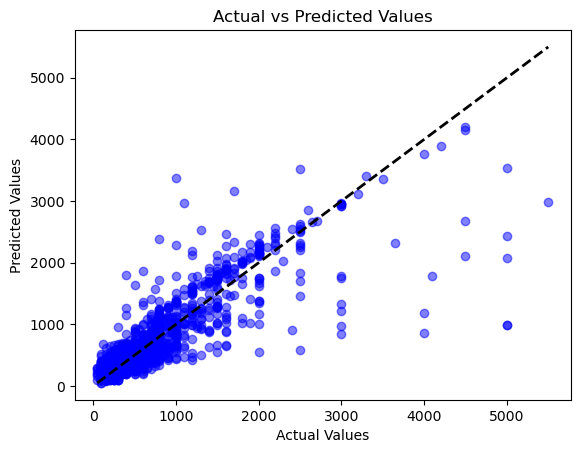

In [66]:
import matplotlib.pyplot as plt

# Assuming `y_test` and `y_pred` are the true and predicted values for your test set
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


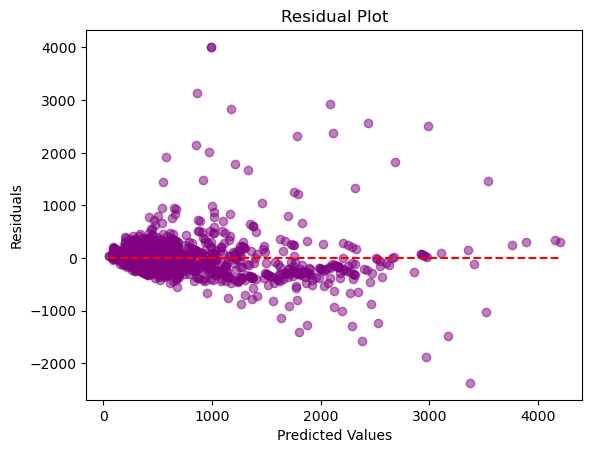

In [67]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='purple', alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed', colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


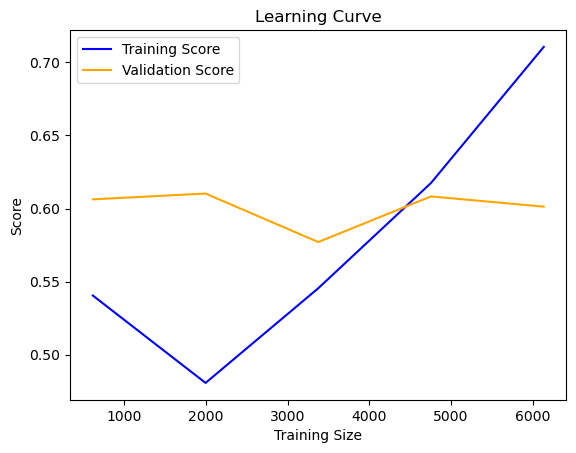

In [70]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(regressor, x, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Score', color='orange')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


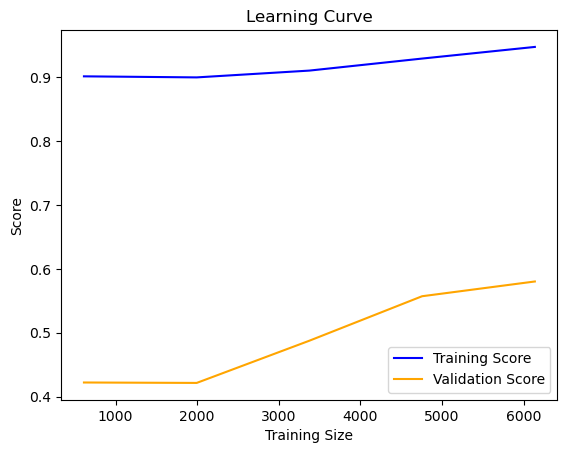

In [72]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
regressor1=RandomForestRegressor(n_estimators=100)
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(regressor1, x, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Score', color='orange')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


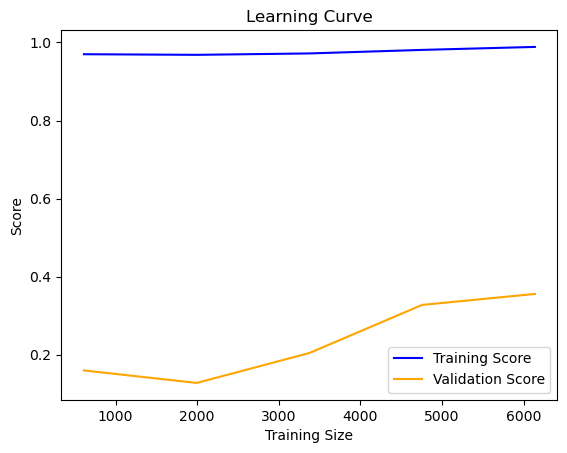

In [73]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
regressor2= DecisionTreeRegressor()
regressor2.fit(x_train,y_train)
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(regressor2, x, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Score', color='orange')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()